# Section 1

In this section, we would like to visualize why using techniques of linear regression (using SSE cost function) fails in linear classification:

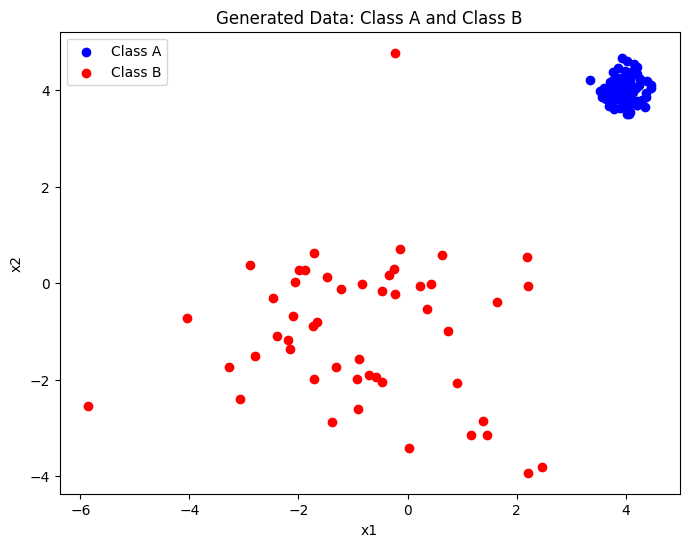

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
class_A = np.random.normal(loc=(4, 4), scale=0.25, size=(100, 2))
labels_A = np.ones(class_A.shape[0])
#np.random.normal(...) produces data with a normal (Gaussian) distribution.
#loc=(4, 4) means that the average of the x and y points is 4, meaning that the cluster center is at point (4, 4).
#scale=0.25 means that the data is very sparse, meaning that the data is close together.
#size=(100, 2) means that there are 100 two-dimensional (x, y) points.
#labels_A = np.ones(...) means that all these points are given the label 1 (i.e. class A).


class_B = np.random.normal(loc=(-1, -1), scale=1.5, size=(50, 2))
labels_B = np.zeros(class_B.shape[0])
#This is the same as class A, but:

#loc=(-1, -1) means the center of cluster B is at point (-1, -1).

#scale=1.5 means the dispersion is much higher → the points are more scattered.

#Only 50 samples are generated (compared to 100 samples for class A).

#labels_B = np.zeros(...) means the labels of these points are zeros (class B).

X = np.vstack((class_A, class_B))
y = np.hstack((labels_A, labels_B))
#np.vstack(...) stacks data from classes A and B vertically to create the entire feature stack (X).
#np.hstack(...) stacks labels horizontally → a label vector is created for all instances

plt.figure(figsize=(8, 6))
#Start drawing a shape measuring 8 x 6 inches.
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.title("Generated Data: Class A and Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


As you can see, the data points are linearly separable in many ways. Now let's fit a line to them:\

Model weights: w1 = 0.08, w2 = 0.11, bias = 0.22


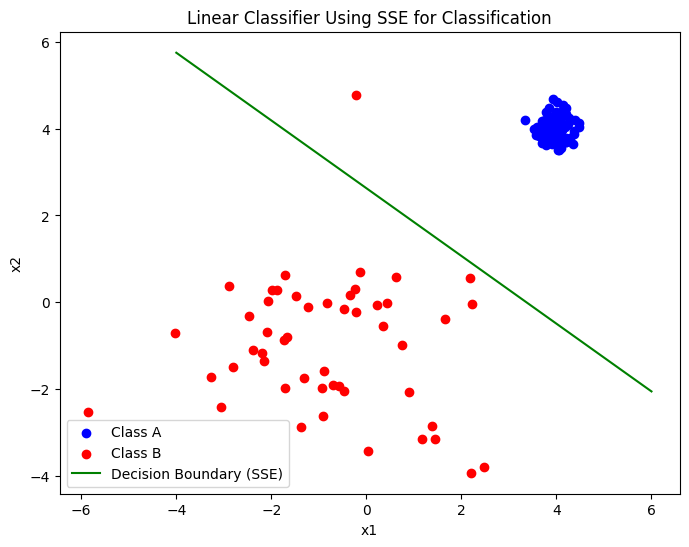

In [2]:
from sklearn.linear_model import LinearRegression
#From the Scikit-Learn library, we import the LinearRegression class.
#This model attempts to create a line that approximates the outputs.

model = LinearRegression()
model.fit(X, y)
#We create a model with model = LinearRegression().
#With model.fit(X, y) we train the model on data X (features) and y (labels).
#Here y are labels of type 0 and 1. So we are doing something like classification using linear regression.

w1, w2 = model.coef_  # weights
w0 = model.intercept_  # bias

print(f"Model weights: w1 = {w1:.2f}, w2 = {w2:.2f}, bias = {w0:.2f}")

# Plot the decision boundary: w1 * x1 + w2 * x2 + b = 0.5
x_vals = np.linspace(-4, 6, 100)
decision_boundary = (-w1 * x_vals - w0 + 0.5) / w2

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.plot(x_vals, decision_boundary, label='Decision Boundary (SSE)', color='green')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()
#This code uses simple linear regression to draw a decision boundary that separates classes A and B.
#This boundary is essentially a line that roughly separates class 0 data from class 1.

Even the best fitted line fails to classify points. **Can you explain why ?**

# Section 2

In this section, we would visualize linearly separable and non-linearly separable data.

## Part A: Linearly Separable Data


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ab_class(n_points=100):
    class_A = []
    class_B = []
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 10)
        y = np.random.uniform(0, 10)
        if y > x and len(class_A) < n_points:
            class_A.append([x, y])
        elif y < x and len(class_B) < n_points:
            class_B.append([x, y])
    return np.array(class_A), np.array(class_B)

class_A, class_B = generate_ab_class()


Plot the data points and include the decision boundary \\( y = x \\).

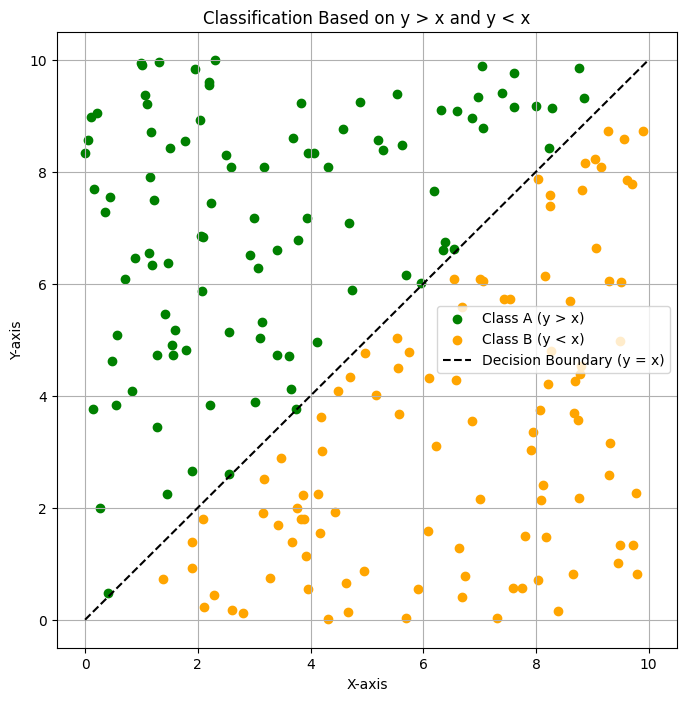

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(class_A[:, 0], class_A[:, 1], color='green', label='Class A (y > x)')
plt.scatter(class_B[:, 0], class_B[:, 1], color='orange', label='Class B (y < x)')
plt.plot([0, 10], [0, 10], color='black', linestyle='--', label='Decision Boundary (y = x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Classification Based on y > x and y < x')
plt.legend()
plt.grid(True)
plt.show()

## Part B: Non-Linearly Separable Data (XOR Problem)

In [4]:
def generate_xor_data(n_points=200, seed=42):
    np.random.seed(seed)
    class_A = []
    class_B = []
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        if (x > 0.5 and y > 0.5) or (x < 0.5 and y < 0.5):
            if len(class_A) < n_points:
                class_A.append([x, y])
        else:
            if len(class_B) < n_points:
                class_B.append([x, y])
    return np.array(class_A), np.array(class_B)

class_A_xor, class_B_xor = generate_xor_data()


Plot the data points. Try to draw a linear decision boundary. Comment on why the classes cannot be separated.

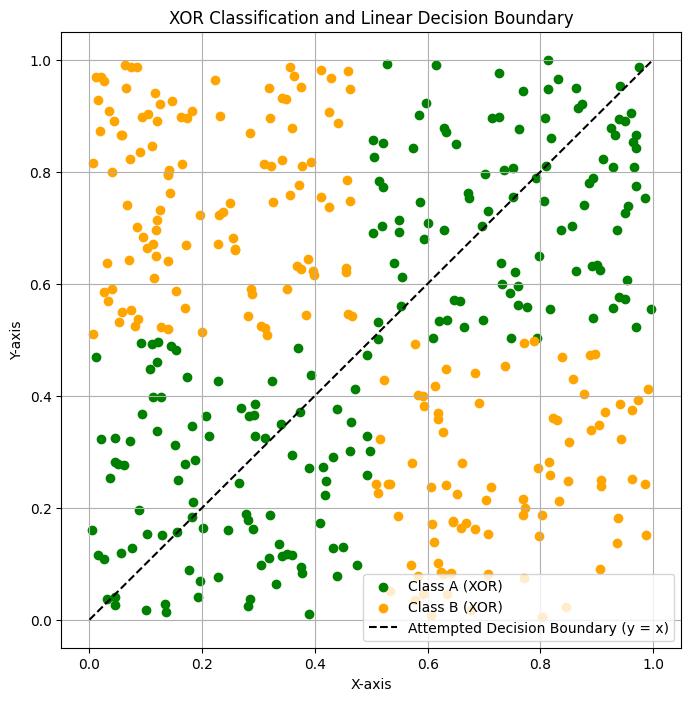

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(class_A_xor[:, 0], class_A_xor[:, 1], color='green', label='Class A (XOR)')
plt.scatter(class_B_xor[:, 0], class_B_xor[:, 1], color='orange', label='Class B (XOR)')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Attempted Decision Boundary (y = x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('XOR Classification and Linear Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


## Part C: Non-Linearly Separable Data (Circular data points)

In [6]:
def generate_data(n_points=200, seed=42):
    np.random.seed(seed)

    # Class 0: points inside a circle with radius 5
    radius_0 = 5
    theta_0 = np.random.uniform(0, 2 * np.pi, n_points)
    r_0 = radius_0 * np.sqrt(np.random.uniform(0, 1, n_points))  # sqrt for uniform distribution
    x0 = r_0 * np.cos(theta_0)
    y0 = r_0 * np.sin(theta_0)
    class_0 = np.vstack((x0, y0)).T

    # Class 1: points in an annulus between radius 8 and 10
    inner_radius_1 = 8
    outer_radius_1 = 10
    theta_1 = np.random.uniform(0, 2 * np.pi, n_points)
    r_1 = np.sqrt(np.random.uniform(inner_radius_1**2, outer_radius_1**2, n_points))
    x1 = r_1 * np.cos(theta_1)
    y1 = r_1 * np.sin(theta_1)
    class_1 = np.vstack((x1, y1)).T

    return class_0, class_1

class_0, class_1 = generate_data()
#Class 0: Inside a circle with radius 5.

#Class 1: In the annular region between radii 8 and 10.

#This is a nonlinear problem, because a linear model cannot separate these two classes.

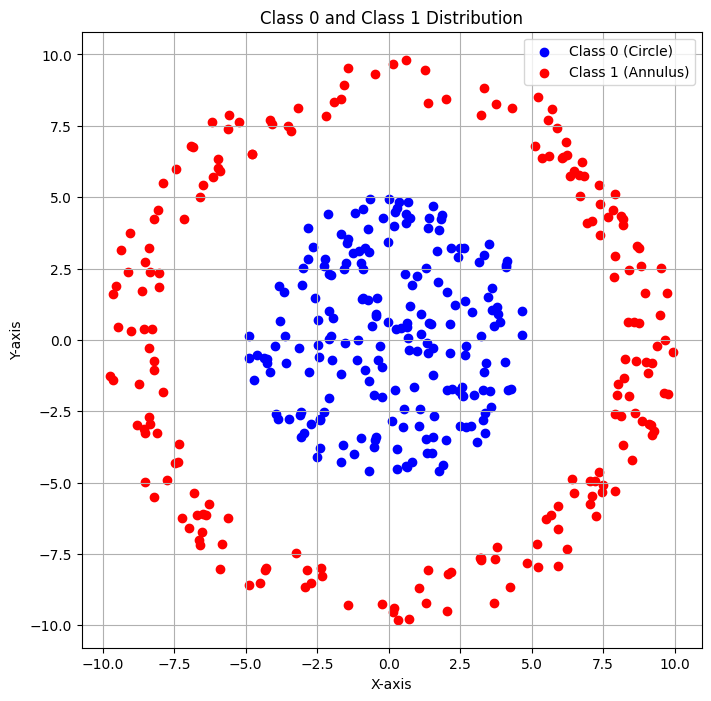

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0 (Circle)')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1 (Annulus)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Class 0 and Class 1 Distribution')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

# Section 3

In this section, we will implement a perceptron classifier from scratch.


The Perceptron class is a simple implementation of the Perceptron algorithm used for binary classification, especially for data that is linearly separable.

In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self.errors_ = []  # storing the number of misclassifications in each epoch
#learning_rate: Learning rate for updating weights.

#n_epochs: Number of training epochs.

#weights: Model weights (initially None, later set to zero).

#bias: Model bias (initially None, later set to zero).

#errors_: A list to store the number of errors per epoch (to check the learning progress).
    def fit(self, X, y):
        """
        Train the Perceptron model on the provided data.

        Parameters:
        X : array-like, shape = [n_samples, n_features]
            Training vectors.
        y : array-like, shape = [n_samples]
            Target values. Must be +1 or -1.
        """
        n_samples, n_features = X.shape
        # starting weights and bias equal zeros
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for epoch in range(self.n_epochs):
            errors = 0
            for idx in range(n_samples):
                linear_output = np.dot(X[idx], self.weights) + self.bias  # w^T x + b
                y_pred = self._unit_step(linear_output)
                if y[idx] != y_pred: # misclassfied
                    update = self.learning_rate * y[idx]
                    self.weights += update * X[idx]
                    self.bias += update
                    errors += 1
            self.errors_.append(errors)
            # if no errors, convergence achieved
            if errors == 0:
                print(f"Converged after {epoch+1} epochs")
                break
#If the true label is +1, the weights move in the direction of the data; if it is -1, the weights move in the opposite direction of the data.

    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters:
        X : array-like, shape = [n_samples, n_features]

        Returns:
        array, shape = [n_samples]
            Predicted class labels.
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step(linear_output)

    def _unit_step(self, x):
        return np.where(x >= 0, 1, -1)
#This function assigns the value 1 to positive or zero inputs and the value -1 to negative inputs.

#Initially, the weights are zero.

#At each epoch:

#For each sample, it makes a prediction.

#If the prediction is wrong, it changes the weights and bias.

#When there are no errors in an epoch, learning stops.

In [4]:
X_ab = np.vstack((class_A, class_B))
#np.vstack: Stacks data from two classes vertically (i.e. all points from class A are placed on top of class B).
#Result: X_ab is an array of shape (200, 2), containing 100 points from class A and 100 points from class B.

y_ab = np.hstack((np.ones(class_A.shape[0]), -np.ones(class_B.shape[0])))
#np.hstack: Stacks two arrays horizontally.

#np.ones(...): Label +1 for class A

#-np.ones(...): Label -1 for class B

#Result:
#y_ab: An array of shape (200,) containing 100 to +1 and 100 to -1

shuffle_idx = np.random.permutation(len(X_ab))
X_ab, y_ab = X_ab[shuffle_idx], y_ab[shuffle_idx]
#np.random.permutation(...): Returns an array of indices in a random order.
#Then we sort X_ab and y_ab in this new order.
#Why? Because all the data for class A comes first, followed by class B. To train the model better, we need to shuffle the data so that the order of the classes doesn't affect the training.
print("Combined Data Sample Points:\n", X_ab[:5])
print("Combined Labels:\n", y_ab[:5])

Combined Data Sample Points:
 [[6.66165506 7.1843576 ]
 [7.93847849 5.48856803]
 [2.43160588 3.40025087]
 [6.87613024 6.54054319]
 [7.09275347 5.47059919]]
Combined Labels:
 [-1. -1.  1. -1. -1.]


In [5]:
perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)
perceptron.fit(X_ab, y_ab)

print(f"Final Weights: {perceptron.weights}")
print(f"Final Bias: {perceptron.bias}")
#This means that the model has succeeded in completely separating the classes after seeing all the data 8 times.

Converged after 2 epochs
Final Weights: [-0.01045119 -0.01745709]
Final Bias: 0.15


Let us visualize the decission boundary:

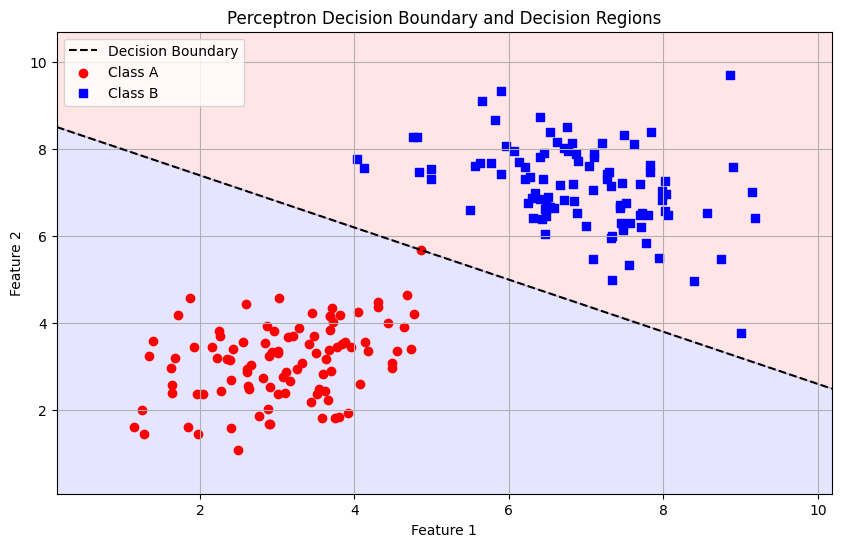

In [6]:
from matplotlib.colors import ListedColormap

x_min, x_max = X_ab[:, 0].min() - 1, X_ab[:, 0].max() + 1
y_min, y_max = X_ab[:, 1].min() - 1, X_ab[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

if perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -perceptron.bias / perceptron.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

plt.scatter(class_A[:, 0], class_A[:, 1], color='red', marker='o', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], color='blue', marker='s', label='Class B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Decision Regions')
plt.legend()
plt.grid(True)
plt.show()
#The red and blue areas represent the model predictions.

# Section 4 (lernova)

In the Lernova project, we want to classify children in the classroom by their attention level, using two simple features:



In [55]:
from google.colab import files
uploaded = files.upload()


Saving lernova_student_data.csv to lernova_student_data (1).csv


In [56]:
import pandas as pd

df = pd.read_csv('lernova_student_data.csv')
print(df.columns.tolist())



['ID', 'Name', 'Study Time (hrs)', 'Focus (%)', 'Attempts', 'Final Score', 'Passed', 'Skill Level', 'Age', 'Gender', 'Platform Used', 'Feedback Score']


Split data to 80% train and 20% test:

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n = 200

# First group: Students who have studied well but have average concentration.
study_time_1 = np.random.normal(8, 1.5, n//2)
focus_1 = np.random.normal(65, 10, n//2)
score_1 = study_time_1 * 0.7 + focus_1 * 0.1 + np.random.normal(0, 2, n//2)

# Second group: Studying less but concentrating more or vice versa
study_time_2 = np.random.normal(4, 1.5, n//2)
focus_2 = np.random.normal(55, 15, n//2)
score_2 = study_time_2 * 0.7 + focus_2 * 0.1 + np.random.normal(0, 2, n//2)

study_time = np.concatenate([study_time_1, study_time_2])
focus = np.concatenate([focus_1, focus_2])
final_score = np.concatenate([score_1, score_2])
passed = (final_score >= 10).astype(int)

df = pd.DataFrame({
    'Study Time (hrs)': study_time,
    'Focus (%)': focus,
    'Final Score': final_score,
    'Passed': passed
})

print(df.head())


   Study Time (hrs)  Focus (%)  Final Score  Passed
0          8.745071  50.846293    11.921754       1
1          7.792604  60.793547    12.655746       1
2          8.971533  61.572855    14.603461       1
3         10.284545  56.977227    15.004508       1
4          7.648770  63.387143     8.937515       0


Final Weights: [9.28836863 2.34986508]
Final Bias: -122.39999999999279


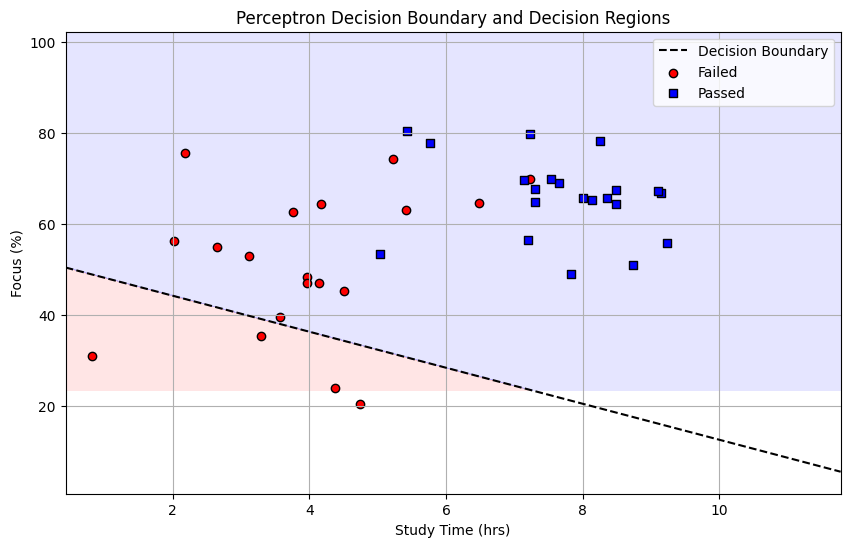

In [58]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

selected_features = ['Study Time (hrs)', 'Focus (%)']
X = df[selected_features].values
y = df['Passed'].values  # 1 = Pass, 0 = Fail

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

y_train_perceptron = np.where(y_train == 0, -1, 1)
y_test_perceptron = np.where(y_test == 0, -1, 1)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.n_epochs):
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)
perceptron.fit(X_train, y_train_perceptron)

print(f"Final Weights: {perceptron.weights}")
print(f"Final Bias: {perceptron.bias}")

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

if perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -perceptron.bias / perceptron.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1],
            color='red', marker='o', edgecolor='k', label='Failed')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1],
            color='blue', marker='s', edgecolor='k', label='Passed')

plt.xlabel('Study Time (hrs)')
plt.ylabel('Focus (%)')
plt.title('Perceptron Decision Boundary and Decision Regions')
plt.legend()
plt.grid(True)
plt.show()
